In [13]:
import jpype

In [7]:
path = jpype.getDefaultJVMPath()
print(path)

C:\Program Files\Java\jre1.8.0_202\bin\server\jvm.dll


In [41]:
from bs4 import BeautifulSoup # html 파싱 (html 문서로 변환시켜주는 역할)
from urllib.request import Request, urlopen # 원격 서버 파일 요청
req = Request('https://www.federalreserve.gov/default.htm', headers={'User-Agent': 'Mozilla/5.0'}) # web 문서 get
data = urlopen(req).read() # text 형태 읽음
data

src = data.decode('utf-8') # 한글이 깨지지 않도록 decoding
src # text 형태
html = BeautifulSoup(src, 'html.parser') # html 파싱 => html 태그 (웹문서) 형태
html

# 1) 1개 tag 찾기
link = html.find('Brainard') # 최초 발견 태그 가져오기

link.string

# 2) n개 tag 찾기
links = html.find_all('Brainard') # 전체 < a> 태그 가져오기 => list 형태로

type(links) # bs4.element.ResultSet
len(links)

link_data = [] # 빈 list
for link in links : # 345
    data = link.string
    print(data) # 내용
    if data : # None 제외
        link_data.append(link.string)
        
link_data

AttributeError: 'NoneType' object has no attribute 'string'

In [4]:
import pytagcloud

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KIC\\anaconda3\\lib\\site-packages\\pytagcloud\\fonts\\fonts.json'

In [9]:
from bs4 import BeautifulSoup # html 파싱 (html 문서로 변환시켜주는 역할)
from urllib.request import Request, urlopen # 원격 서버 파일 요청

# 1. url 요청

req = Request('https://www.federalreserve.gov/default.htm', headers={'User-Agent': 'Mozilla/5.0'}) # web 문서 get
print(req)
src = urlopen(req).read()

# 2. html 파싱

html = BeautifulSoup(src, "html.parser")
html

# 3. tag[속성='값']

links = html.select("a[class='link_txt']")
len(links) # 115

links[:10]
links[-10:]

# 4. tag 내용 수집

crawling_data = []

for a in links :
    #print(a.string)
    cont = a.string
    if cont : # None 제외
        cont = str(cont)
        # strip() : 문장 끝 불용어 제거
        crawling_data.append(cont.strip())
        
crawling_data

## Today, 실시간 검색어 제외
#index = 0
#for i, c in enumerate(crawling_data) :
   # if c == 'vaccinated' :  # 웹페이지를 살펴보면 뉴스기사 다음에 코스피 등장, 이후가 필요없는 정보들
    #    print('index =', i)
     #   index = i # 49
        
#crawling_data = crawling_data[:index]
#crawling_data


# 5. file save 
type(crawling_data) # list

import pickle

# save
file = open("data.pickle", mode='wb') # 'wb' : write, binary(이진)
pickle.dump(crawling_data, file) # 원래 list 형태를 그대로 저장 -> 불러올때도 그대로 불러와짐

# load
file = open("data.pickle", mode='rb') # 'rb' : read, binary
crawling_data2 = pickle.load(file)

crawling_data2

from konlpy.tag import Kkma
import pickle

file = open("data.pickle", mode='rb') # 'rb' : read, binary
crawling_data = pickle.load(file)
crawling_data
len(crawling_data) # 49

kkma = Kkma() 


ex_nouns = []

for sent in crawling_data : # doc -> sentence
    for noun in kkma.nouns(sent) : # sentence -> noun
        ex_nouns.append(noun)

ex_nouns
len(ex_nouns) # 503

from re import match

nouns_count = {} # 빈 set

for noun in ex_nouns :
    # 2음절 이상, 숫자 제외
    if len(str(noun)) > 1 and not(match('^[0-9]', noun)) :
        nouns_count[noun] = nouns_count.get(noun, 0) + 1

nouns_count

# del nouns_count['오늘']

from collections import Counter

counter = Counter(nouns_count)
top10 = counter.most_common(n=10)
top10 

import pytagcloud
import webbrowser

# tag에 color, size, tag 사전 구성 
word_count_list = pytagcloud.make_tags(top10, maxsize=80)
# maxsize : 최대 글자크기
print(word_count_list)

pytagcloud.create_tag_image(word_count_list,
                            'newsCrawling.jpg', 
                            size=(900, 600), 
                            fontname='korean', rectangular=False)

 

webbrowser.open('wordcloud.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KIC\\anaconda3\\lib\\site-packages\\pytagcloud\\fonts\\fonts.json'

In [78]:
# 기사본문을 저장할 리스트를 생성합니다.
FED_list = []

# 기사가 저장된 파일은 data 폴더 안에 저장되어 있습니다.
file_path = "텍스트 마이닝/brainard20230119a.pdf"

# 기사가 저장된 파일을 불러옵니다.
from PyPDF2 import PdfReader
pdf = []
for i in range(0,len(pdf1.pages)):
    pdf.append(pdf1.pages[i].extract_text().split('\n'))

f = pdf
for line in f:
    col = line.strip().split("\t")
    #group = col[0]
    #source = col[1]
    #datetime = col[2]
    #title = col[3]
    # 기사의 본문만 가져와 리스트에 저장합니다.
    content = col[4]
    FED_list.append(content)
f.close()

print("총 기사 수 :", len(FED_list))

총 기사 수 : 0


In [25]:
import chardet

with open("./text mining/brainard20230119a.pdf", "r") as f:
    file_data = f.readline()
    
print(chardet.detect(file_data.encode()))

FileNotFoundError: [Errno 2] No such file or directory: './text mining/brainard20230119a.pdf'

In [20]:
from tika import parser
pdf_path = "./text mining/brainard20230119a.pdf"
data = parser.from_file(pdf_path)
content = data["content"].strip()

with open("./output.txt", 'w', encoding='Utf-8') as txt:
    print(content, file=txt)

UnicodeDecodeError: 'cp949' codec can't decode byte 0xed in position 147: illegal multibyte sequence

In [44]:
# 기사본문을 저장할 리스트를 생성합니다.
article_list = []

# 기사가 저장된 파일은 data 폴더 안에 저장되어 있습니다.
file_path = "./text mining/Brainard_230119.txt"

# 기사가 저장된 파일을 불러옵니다.
f = open(file_path, encoding="utf-8")
for line in f:
    col = line.strip().split("\t")
    content = col[0]
    article_list.append(content)
f.close()

print("총 기사 수 :", len(article_list))

IndexError: list index out of range

In [45]:
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [47]:
article_list = []
file_path = "./text mining/Brainard_230119.txt"
f = open(file_path, encoding="utf-8")
for line in f:
    col = line.strip().split("\t")
    content = col[0]
    article_list.append(content)
f.close()

from konlpy.tag import Kkma
kkma = Kkma()

# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.
tag_sentence_list = []

# 불용어를 리스트를 정의합니다.
# stop_list = ["카페", "카페규정"]

# 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성합니다.
pos_list = ["NNG", "NNP", "PRP", "VBP", "VB"]

now = 0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)
    
    
# 단어와 빈도를 쌍으로 저장할 딕셔너리를 생성합니다.
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        # 단어가 word_frequency의 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
            
# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
word_count = []
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

# 단어의 빈도 상위 N개를 출력합니다.
for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\KIC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

inflation	32
service	16
policy	13
growth	12
core	12
wage	11
ha	10
recent	10
good	10
declined	9
year	9
real	9
point	9
demand	9
price	9
basis	9
more	8
rate	8
average	8
labor	8


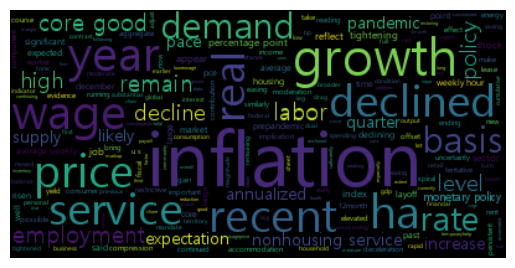

In [84]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

with open("./text mining/Brainard_230119.txt", 'r', encoding='utf8') as f:
    content = f.read()
    
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content) # 문장단위로 끊기
cleaned_content = cleaned_content.lower()   # 소문자화
word_tokens = nltk.word_tokenize(cleaned_content) # tokenization
tokens_pos = nltk.pos_tag(word_tokens) #품사 분리

# 특정 품사만 추출하기
words = []
for word, pos in tokens_pos:
    if 'NN' in pos: # 명사
        words.append(word)
    elif 'VB' in pos: # 동사
        words.append(word)
    elif 'JJ' in pos: # 형용사
        words.append(word)
    elif 'RB' in pos: # 부사
        words.append(word)

# 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하게끔 만들기
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

final_NN_words = lemmatized_words

customized_stopwords = ['be', 'is', 'are', "it’s", "don’t", "have", "percent", "month"] # 직접 만든 불용어 사전, 사실 txt 파일로 정리해놓는게 편리

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
k = 20

word_count = []
for word, freq in c.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
from PyPDF2 import PdfReader
pdf1 = PdfReader(open(r'C:\Users\KIC\Desktop\자산배분실\파이썬\텍스트 마이닝/brainard20230119a.pdf','rb'))
pdf = []
for i in range(0,len(pdf1.pages)):
    pdf.append(pdf1.pages[i].extract_text().split('\n'))

pdf_str = '\n'.join(map(str,pdf))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KIC\\Desktop\\자산배분실\\파이썬\\텍스트 마이닝/brainard20230119a.pdf'

In [ ]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()


str_list = ['This', 'is', 'a', 'python tutorial']
result = listToString(str_list)
print(result)